In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
customer = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customer.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [4]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [5]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [6]:
customer.duplicated().sum()

0

In [7]:
transactions.duplicated().sum()

0

In [8]:
products.duplicated().sum()

0

In [9]:
customer.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [10]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [11]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [12]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [13]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [14]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [15]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [17]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])

In [18]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [19]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [20]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [21]:
df = transactions.merge(customer, on="CustomerID").merge(products, on="ProductID")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [23]:
# 1. Total number of unique customers, products, and transactions
num_customers = customer['CustomerID'].nunique()
num_products = products['ProductID'].nunique()
num_transactions = transactions['TransactionID'].nunique()

In [24]:
print(f"\nTotal Customers: {num_customers}, Total Products: {num_products}, Total Transactions: {num_transactions}")


Total Customers: 200, Total Products: 100, Total Transactions: 1000


C:\Users\Pugazh\AppData\Local\Temp\ipykernel_6588\4221823791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=customer["Region"], order=customer["Region"].value_counts().index, palette="viridis")


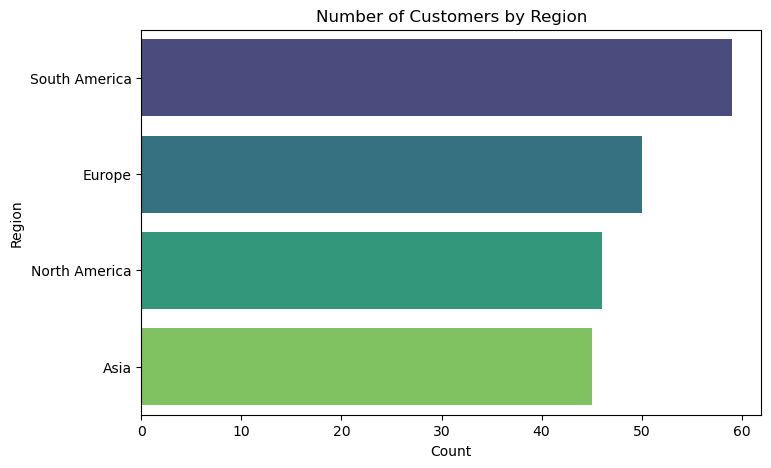

In [25]:
# 2. Distribution of customers by region
plt.figure(figsize=(8, 5))
sns.countplot(y=customer["Region"], order=customer["Region"].value_counts().index, palette="viridis")
plt.title("Number of Customers by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

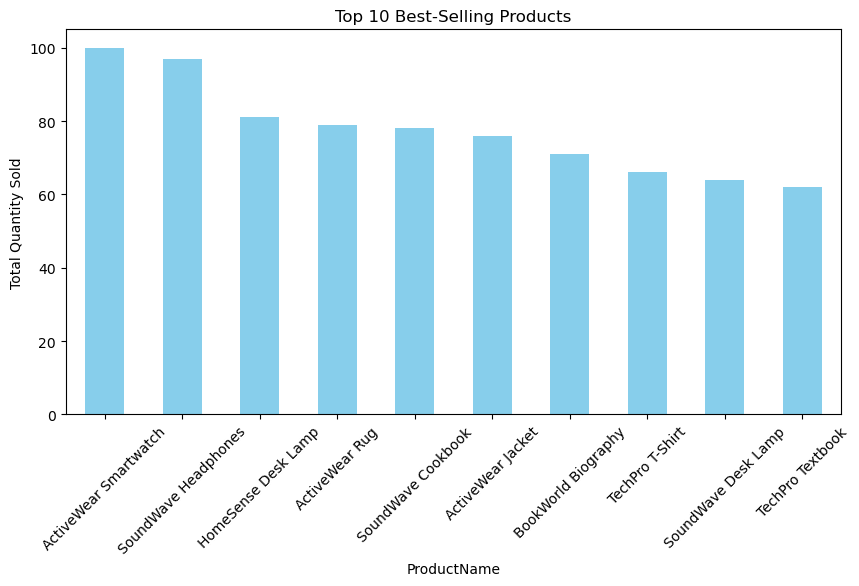

In [28]:
#3. Top 10 Best-Selling Products
top_products = df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Best-Selling Products")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

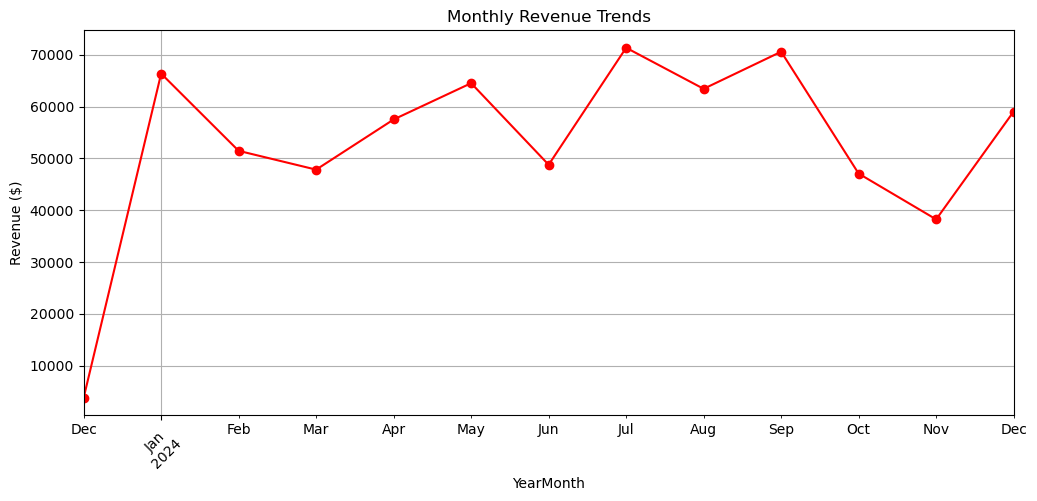

In [29]:
# 4. Revenue trends over time
df['YearMonth'] = df['TransactionDate'].dt.to_period('M')
monthly_revenue = df.groupby("YearMonth")["TotalValue"].sum()

plt.figure(figsize=(12, 5))
monthly_revenue.plot(marker="o", color="red", linestyle="-")
plt.title("Monthly Revenue Trends")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

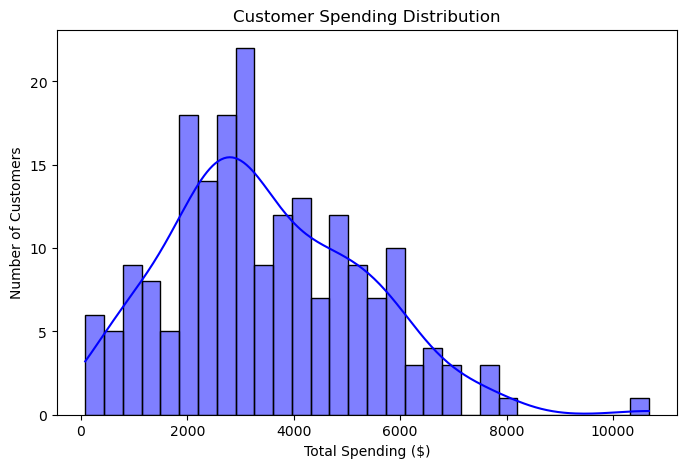

In [30]:
# 5. Customer Spending Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df.groupby("CustomerID")["TotalValue"].sum(), bins=30, kde=True, color="blue")
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spending ($)")
plt.ylabel("Number of Customers")
plt.show()

In [34]:
# --------------------- Business Insights ---------------------
business_insights = """
1. The majority of customers are from the {top_region} region, contributing to X% of total revenue.
2. The best-selling product is '{top_product}', indicating high demand.
3. Monthly revenue trends show peak sales in {top_month}, suggesting seasonal demand.
4. The majority of customers spend between ${low_spend} and ${high_spend}, with a few high-value customers.
5. The top 10% of customers contribute to nearly {top_customer_percent}% of total revenue, emphasizing the importance of customer retention.
"""

In [35]:
# Calculate dynamic values for insights
top_region = customer["Region"].value_counts().idxmax()
top_product = top_products.idxmax()
top_month = monthly_revenue.idxmax()
low_spend = df.groupby("CustomerID")["TotalValue"].sum().quantile(0.25)
high_spend = df.groupby("CustomerID")["TotalValue"].sum().quantile(0.75)
top_customer_percent = round(df.groupby("CustomerID")["TotalValue"].sum().nlargest(int(0.1 * num_customers)).sum() / df["TotalValue"].sum() * 100, 2)


In [36]:
print(business_insights.format(top_region=top_region, top_product=top_product, top_month=top_month,
                               low_spend=int(low_spend), high_spend=int(high_spend), top_customer_percent=top_customer_percent))


1. The majority of customers are from the South America region, contributing to X% of total revenue.
2. The best-selling product is 'ActiveWear Smartwatch', indicating high demand.
3. Monthly revenue trends show peak sales in 2024-07, suggesting seasonal demand.
4. The majority of customers spend between $2162 and $4770, with a few high-value customers.
5. The top 10% of customers contribute to nearly 19.97% of total revenue, emphasizing the importance of customer retention.

